In [9]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, StackingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score 

In [68]:
df = pd.read_csv('conversion_project.csv')

In [69]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [70]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


Text(0, 0.5, 'user count')

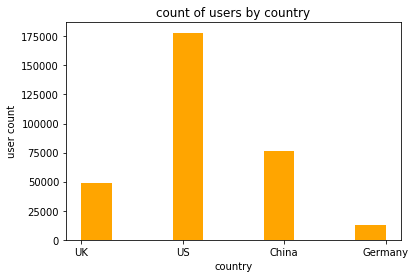

In [71]:
plt.hist(df['country'], color='orange')
plt.title('count of users by country')
plt.xlabel('country')
plt.ylabel('user count')

{'whiskers': [<matplotlib.lines.Line2D at 0x144842390>,
 'caps': [<matplotlib.lines.Line2D at 0x144842a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x144842080>],
 'medians': [<matplotlib.lines.Line2D at 0x14484a0f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14484a438>],
 'means': []}

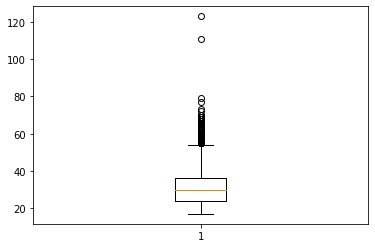

In [72]:
plt.boxplot(df['age'])

(array([ 99456.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 216744.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

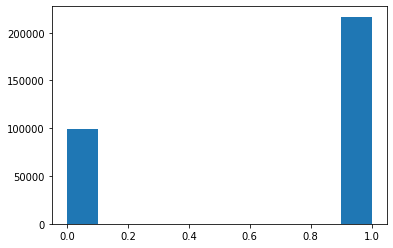

In [73]:
plt.hist(df['new_user'])

(array([1.28436e+05, 1.07615e+05, 5.31670e+04, 1.70830e+04, 4.23600e+03,
        3.27000e+03, 1.69200e+03, 5.89000e+02, 1.02000e+02, 1.00000e+01]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

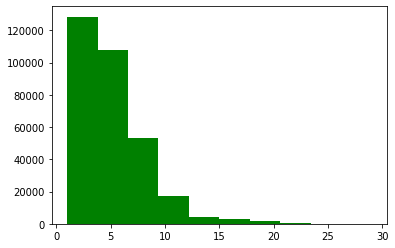

In [74]:
plt.hist(df['total_pages_visited'], color = 'green')

(array([ 88740.,      0.,      0.,      0.,      0., 155040.,      0.,
             0.,      0.,  72420.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

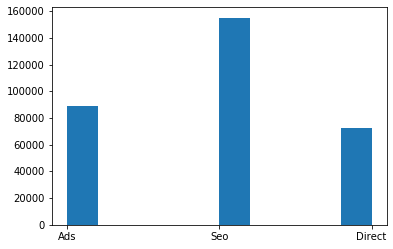

In [75]:
plt.hist(df['source'])

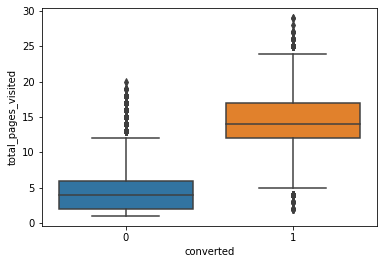

In [76]:
sns.boxplot(x=df['converted'], y=df['total_pages_visited'], data=df) 

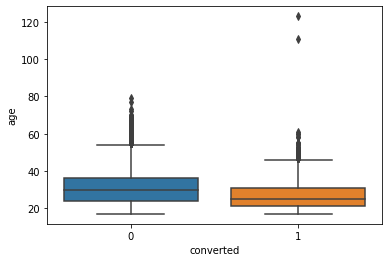

In [77]:
sns.boxplot(x=df['converted'], y=df['age'], data=df) 

In [85]:
# one hot encoding 'country'
ohe = OneHotEncoder(sparse = False)
ohe_country = pd.DataFrame(ohe.fit_transform(pd.DataFrame(df['country'])), columns= ohe.get_feature_names())
ohe_source = pd.DataFrame(ohe.fit_transform(pd.DataFrame(df['source'])), columns= ohe.get_feature_names())
df = pd.concat([df, ohe_country, ohe_source], axis=1)

In [86]:
df

,country,age,new_user,source,total_pages_visited,converted,x0_China,x0_Germany,x0_UK,x0_US,x0_Ads,x0_Direct,x0_Seo,x0_China,x0_Germany,x0_UK,x0_US,x0_Ads,x0_Direct,x0_Seo
0,UK,25,1,Ads,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,US,23,1,Seo,5,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,US,28,1,Seo,4,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,China,39,1,Seo,5,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,US,30,1,Seo,6,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
316196,US,27,1,Direct,6,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
316197,China,25,0,Ads,4,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
316198,US,22,0,Seo,4,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [87]:
X = df.drop(['converted', 'country','source'], axis=1)
y = df['converted']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [89]:
ss = StandardScaler()

In [91]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [93]:
lgr = LogisticRegression(random_state=123)

lgr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
lgr.score(X_train, y_train)

0.9861522243305925

In [95]:
y_predict = lgr.predict(X_test)

In [96]:
def metrics(y_true, y_pred):
    print('Accuracy: ' + str(accuracy_score(y_true, y_pred)))
    print('Precision: ' + str(precision_score(y_true, y_pred)))
    print('Recall: ' + str(recall_score(y_true, y_pred)))
    print('F1: ' + str(f1_score(y_true, y_pred)))
    print('\n')

In [97]:
metrics(y_test, y_predict)

Accuracy: 0.9468690702087287
Precision: 0.35725964682799216
Recall: 0.8903830480847595
F1: 0.5099183197199534




In [102]:
rf = RandomForestClassifier(n_estimators=200)

In [103]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
metrics(y_test, rf.predict(X_test))

Accuracy: 0.46495888678051867
Precision: 0.054759616459176146
Recall: 0.9983700081499592
F1: 0.10382455768619558




In [106]:
confusion_matrix(y_test, lgr.predict(X_test))

array([[72665,  3931],
       [  269,  2185]])

In [107]:
print(classification_report(y_test, lgr.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     76596
           1       0.36      0.89      0.51      2454

    accuracy                           0.95     79050
   macro avg       0.68      0.92      0.74     79050
weighted avg       0.98      0.95      0.96     79050

